In [73]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE

In [33]:
data_teste = pd.read_csv("data/teste_normalized.csv")
data_treino = pd.read_csv("data/train_normalized.csv")

### SEPARING THE DATA

In [3]:
X_train= data_treino.drop(columns="label")
y_train = data_treino.label

print(X_train.shape)
y_train.shape

(2620, 9)


(2620,)

In [4]:
X_test = data_teste.drop(columns="label")
y_test = data_teste.label
print(X_test.shape)
y_test.shape

(656, 9)


(656,)

## PCA 


In [72]:
pca = PCA(n_components= 1)
pca.fit(X = X_train, y = y_train)
print("variancia:",np.round(pca.explained_variance_ratio_,5))
X_train_pca = pca.transform(X = X_train)
X_test_pca = pca.transform(X = X_test)


variancia: [0.99999]


### 
Para definir o n_components deve-se observar os resultados da variancia e somar os primeiro valores ate compor 95% se tiver poucos atributos e se tiver muitos atributos deve se buscar 98%

In [64]:
data_train_pca = pd.DataFrame(X_train_pca, columns=["PCA_1"])
data_train_pca['label'] = y_train.to_list()
data_train_pca

,PCA_1,label
0,-1309.500015,0
1,-1308.499933,0
2,-1307.500033,0
3,-1306.500072,0
4,-1305.500050,0
...,...,...
2615,1305.499906,1
2616,1306.500015,1
2617,1307.500101,0
2618,1308.499954,0


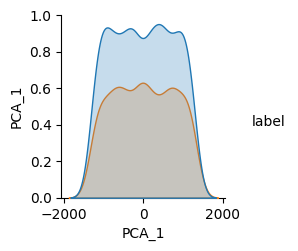

In [65]:
sns.pairplot(data = data_train_pca,hue= "label")

### TSNE 

In [87]:
X_train

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104
1,1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829
2,2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183
3,3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584
4,4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260
...,...,...,...,...,...,...,...,...,...
2615,2615,-1.983229,0.366111,-0.029081,-0.794690,-1.994638,-0.918494,-1.241751,0.812639
2616,2616,0.482890,-0.966755,0.389467,0.478776,-0.344453,0.318363,0.002472,0.333916
2617,2617,-0.312761,-0.297420,1.004419,0.375135,-1.177037,-0.132780,1.287286,-0.602449
2618,2618,1.159353,0.662635,-0.665997,0.177994,-0.460730,0.640193,-1.215345,0.403374


In [79]:
X_total = pd.concat([X_train, X_test])
X_total

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104
1,1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829
2,2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183
3,3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584
4,4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260
...,...,...,...,...,...,...,...,...,...
651,651,2.009327,0.854007,-0.804269,0.201826,1.122180,1.402581,-0.062715,0.285457
652,652,-0.151925,1.074396,0.058776,-0.901588,0.864593,0.579435,1.584467,1.227598
653,653,0.253970,0.652421,-0.297745,-1.554892,0.833683,0.063462,-0.578190,-0.152566
654,654,-0.837740,-0.349484,2.490852,-1.716377,-1.168487,0.320976,-0.426107,1.986511


In [90]:
tsne = TSNE()
X_train_tsne = tsne.fit_transform(X = X_train)
X_test_tsne = tsne.fit_transform(X = X_total)



/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# MODELS TRAINING

#### KNN

In [75]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train, y=y_train)
knn_predict = knn.predict(X=X_test)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       412
           1       0.41      0.30      0.35       244

    accuracy                           0.58       656
   macro avg       0.53      0.52      0.52       656
weighted avg       0.56      0.58      0.56       656



### KNN COM PCA 



In [66]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train_pca, y=y_train)
knn_predict = knn.predict(X=X_test_pca)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       412
           1       0.41      0.32      0.36       244

    accuracy                           0.58       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.56      0.58      0.57       656



### KNN COM TSNE

In [97]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train_tsne, y=y_train)
knn_predict = knn.predict(X = X_test_tsne[X_train.shape[0]:])
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       412
           1       0.40      0.33      0.36       244

    accuracy                           0.57       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.57      0.56       656



### SVM

In [12]:
clf = SVC()
clf.fit(X = X_train, y= y_train)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM COM OUTRO KERNEL 

In [19]:
clf = SVC(kernel= "sigmoid")
clf.fit(X = X_train, y= y_train)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       412
           1       0.36      0.30      0.32       244

    accuracy                           0.54       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.52      0.54      0.53       656



### SVM COM PCA

In [67]:
clf = SVC()
clf.fit(X = X_train_pca, y= y_train)
clf_predict = clf.predict(X_test_pca)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM COM PCA E OUTRO KERNEL

In [68]:
clf = SVC(kernel = "sigmoid")
clf.fit(X = X_train_pca, y= y_train)
clf_predict = clf.predict(X_test_pca)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      0.45      0.52       412
           1       0.37      0.56      0.45       244

    accuracy                           0.49       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.54      0.49      0.50       656



### RANDOM FOREST


In [72]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train, y= y_train)
rfc_predict = random_forest.predict(X= X_test)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       412
           1       0.51      0.26      0.35       244

    accuracy                           0.63       656
   macro avg       0.59      0.56      0.55       656
weighted avg       0.61      0.63      0.60       656



### RANDOM FOREST COM PCA

In [70]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_pca, y= y_train)
rfc_predict = random_forest.predict(X= X_test_pca)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       412
           1       0.40      0.41      0.41       244

    accuracy                           0.55       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.56      0.55      0.55       656

